# Exercise 1

In this exercise, we will perform classification on a simple dataset.

We can generate the dataset with:

In [22]:
from sklearn.datasets import make_blobs

(X, y) = make_blobs(n_samples=5000, n_features=2, centers=2,
cluster_std=3.5, random_state=1)

X and y are the features and the label, respectively. We can look at the format of the data:

In [23]:
print(type(X))
print(type(y))

print(X.shape)
print(y.shape)

print(X.dtype)
print(y.dtype)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(5000, 2)
(5000,)
float64
int32


As you can see, X and y are numpy arrays. There are a total of 5000 samples in the dataset. X has 2 features per sample, and y are the corresponding classes.

## Plotting the data

When working with a dataset, it is always helpful to visualize the data that we are working with, in order to be able to check if our results are meaningful. We will use matplotlib to plot the data.

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

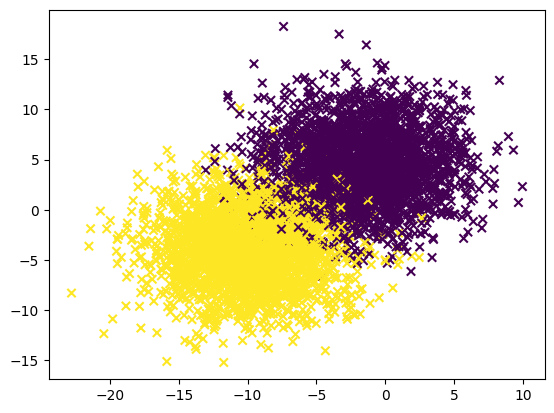

In [25]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], marker="x", c=y)
plt.show()

We can see that the two clusters are not linearily separable, but a linear classification would still yield good results. Your tasks in this notebook are now:

- Add and adapt your regression code (using numpy, not sklearn) from the previous exercise, so that is can predict the class label for each sample. This means, we treat the class of a point (0 or 1) as the target value of the regression. The linear regression will then yield us a formula that can give each (x, y) location a score, which class it might belong to. It's not a probability because it does not need to be between 0 and 1, but we can interpret a value being nearer to 0 as a higher probability for the class 0, and a value being nearer to 1 as a higher probability for class 1.
- Perform a classification of the dataset using the regression formula. That means, assign the class 0 to data points that have a regression 'score' that is nearer to 0 than to 1, and assign the class 1 to the other points. Visualize the learned classification with matplotlib by coloring each (x, y) pair in the dataset with a color that depends on your classification (e.g. yellow for class 0, blue for class 1).
- Calculate the classification accurracy $\left( \frac{n_{\text{correctly-classified}}}{(n_{\text{correctly-classified}} + n_{\text{incorrectly-classified}})} \right) $
- Bonus: If everything works, you will see that your classification splits the dataset at a specific line between the two clusters. Calculate the formula for this line and plot it as a line using matplotlib.
- After you have done the iris classification exercise, print out the [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) using sklearn for this binary classification task. Then, plot the precision-recall curve using [precision_recall_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html#sklearn.metrics.precision_recall_curve) and matplotlib
- Bonus: After you have done all the above, write your own code to calculate the metrics shown in classification_report and use that code to generate the precision-recall curve manually.

## Solution

In [26]:
#importing libraries
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [27]:
# Generate a random binary classification dataset using make_blobs
X, y = make_blobs(n_samples=5000, n_features=2, centers=2, cluster_std=3.5, random_state=1)


In [28]:
# Normalize the features using z-score normalization
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
# Add a column of ones to the feature matrix for the intercept term
X = np.hstack((np.ones((X.shape[0], 1)), X))

In [29]:
# Compute the normal equation to find the model parameters
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

In [30]:
# Predict the class labels for each point
scores = np.dot(X, theta)
y_pred = np.where(scores >= 0.5, 1, 0)

In [32]:
# Define the x-coordinates for the decision boundary line
boundary_x = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
# Calculate the corresponding y-coordinates using the learned logistic regression coefficients
boundary_y = -(theta[0] + boundary_x * theta[1]) / theta[2]

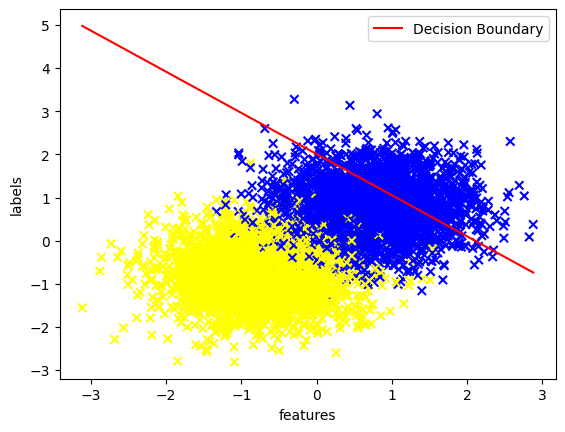

In [34]:
# Define the colors for the points
colors = np.array(['blue', 'yellow'])
plt.figure()
plt.scatter(X[:, 1], X[:, 2], c=colors[y], marker='x',)
plt.plot(boundary_x, boundary_y, color='red', label='Decision Boundary')
plt.xlabel('features')
plt.ylabel('labels')
plt.legend()
plt.show()

In [35]:
# Calculate the classification accuracy
accuracy = np.mean(y_pred == y)
print('Classification accuracy: {:.2f}%'.format(accuracy * 100))

Classification accuracy: 95.86%
